In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [11]:
# Dados
data = {
    'ABS_Gli': [0.982, 0.858, 0.628, 0.416, 0.27],
    'Conc_Gli': [0.900, 0.800, 0.600, 0.400, 0.300],
    'ABS_Sac': [0.471, 0.455, 0.759, 0.552, 0.577],
    'Conc_Sac': [8.077, 6.923, 4.615, 3.462, 1.154],
    'Fator_Diluicao': [6, 6, 3, 3, 1],
    'produto': np.zeros(5),
    'velocidade_reac': np.zeros(5)
}

# Transformar em DataFrame
df = pd.DataFrame(data)
df

,ABS_Gli,Conc_Gli,ABS_Sac,Conc_Sac,Fator_Diluicao,produto,velocidade_reac
0,0.982,0.9,0.471,8.077,6,0.0,0.0
1,0.858,0.8,0.455,6.923,6,0.0,0.0
2,0.628,0.6,0.759,4.615,3,0.0,0.0
3,0.416,0.4,0.552,3.462,3,0.0,0.0
4,0.270,0.3,0.577,1.154,1,0.0,0.0


In [12]:
# Regressão Linear
y = df[['Conc_Gli']]
x = df[['ABS_Gli']]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

print('Coeficientes: ', round(model.coef_[0][0], 4))
print('Intercepto: ', round(model.intercept_[0], 4))
# Métricas de avaliação
print('R² score: ', round(r2_score(y, y_pred), 4))

# Renomear a coluna 'ABS_Sac' para 'ABS_Gli' temporariamente para fazer a previsão
df_temp = df.drop(columns=['ABS_Gli'])
df_temp = df_temp.rename(columns={'ABS_Sac': 'ABS_Gli'})

# Prever valores usando o modelo
y_pred_sac = model.predict(df_temp[['ABS_Gli']])

# Atualizar DataFrame com as previsões e calcular a velocidade de reação
for i in range(len(df)):
    df.iloc[i, df.columns.get_loc('produto')] = y_pred_sac[i] * df.iloc[i, df.columns.get_loc('Fator_Diluicao')]

# Calcular a velocidade de reação
df['velocidade_reac'] = df['produto'] / 5  # 5min de reação
df


Coeficientes:  0.8597
Intercepto:  0.0577
R² score:  0.9986


,ABS_Gli,Conc_Gli,ABS_Sac,Conc_Sac,Fator_Diluicao,produto,velocidade_reac
0,0.982,0.9,0.471,8.077,6,2.775718,0.555144
1,0.858,0.8,0.455,6.923,6,2.693187,0.538637
2,0.628,0.6,0.759,4.615,3,2.130641,0.426128
3,0.416,0.4,0.552,3.462,3,1.596767,0.319353
4,0.270,0.3,0.577,1.154,1,0.553748,0.110750


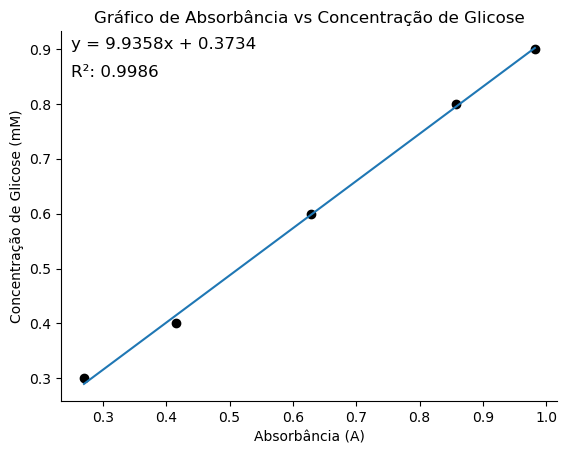

In [34]:
# Criar o gráfico Curvao padrao
plt.scatter(x, y, color='black')
plt.plot(x, y_pred)

# Adicionar texto e configurações
plt.text(0.25, 0.9, f'y = {round(model.coef_[0][0], 4)}x + {round(model.intercept_[0], 4)}', fontsize=12, color='black')
plt.text(0.25, 0.85, f'R²: {round(r2_score(y, y_pred), 4)}', fontsize=12, color='black')

plt.ylabel('Concentração de Glicose (mM)')
plt.xlabel('Absorbância (A)')
plt.title('Gráfico de Absorbância vs Concentração de Glicose')

# Obter os eixos atuais e remover linhas topo e direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

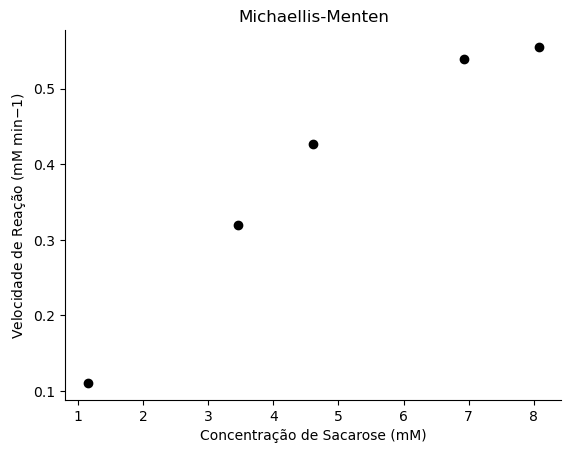

In [14]:
#Michaellis-Menten
plt.scatter(df[['Conc_Sac']], df[['velocidade_reac']], color='black')

# Labels
plt.ylabel('Velocidade de Reação (mM min$-$$1$)')
plt.xlabel('Concentração de Sacarose (mM)')
plt.title('Michaellis-Menten')

# Obter os eixos atuais e remover linhas topo e direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

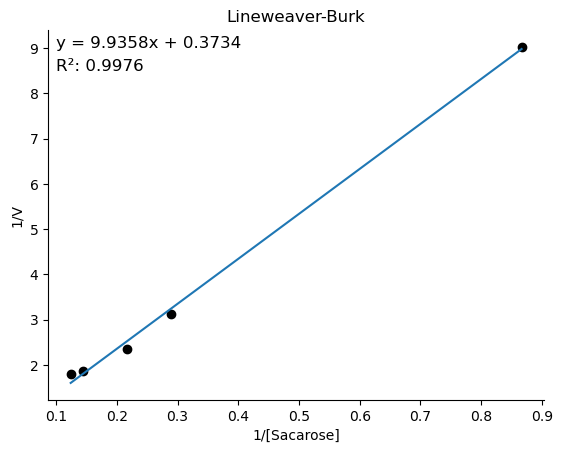

Velocidade máxima de reação: 2.6779 
Coeficiente Km: 26.6074


In [30]:
#Lineweaver-Burk
plt.scatter(1/df[['Conc_Sac']], 1/df[['velocidade_reac']], color='black')

# Labels
plt.ylabel('1/V')
plt.xlabel('1/[Sacarose]')
plt.title('Lineweaver-Burk')

# Obter os eixos atuais e remover linhas topo e direita
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Regressão linear
y_ = 1/df[['velocidade_reac']]
x_= 1/df[['Conc_Sac']]
burk = model.fit(1/df[['Conc_Sac']], y_)
y_burk = burk.predict(x_)
plt.text(0.1, 9, f'y = {round(burk.coef_[0][0], 4)}x + {round(burk.intercept_[0], 4)}', fontsize=12, color='black')
plt.text(0.1, 8.5, f'R²: {round(r2_score(y_, y_burk), 4)}', fontsize=12, color='black')
plt.plot(x_,y_burk)

plt.show()

print(f'Velocidade máxima de reação: {round(1/burk.intercept_[0], 4)} \nCoeficiente Km: {round(1/burk.intercept_[0]*burk.coef_[0][0], 4)}')